# Introducción a los filtros digitales en imágenes

En este taller construiremos un filtro muy simple que permitirá detectar los bordes en una imagen.
Primero cargaremos las librerías de Python necesarias: matplotlib, numpy y scipy.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline


import numpy as np
import scipy.signal as sp

Ahora leeremos el archivo Dog.png, que es una fotografía de *Elwood*, un perro muy famoso en la comunidad de procesamiento de imágenes. Esto se hace con el comando ```imread``` de matplotlib. Este comando lee la imagen del disco y a convierte a una matriz. Después de mostrar la imagen, vemos las dimensiones de la matriz, y vemos que tiene 765 píxeles de ancho, 1366 de alto y cuatro dimensiones adicionales: una para cada color (rojo, verde, azul) y otra para el nivel de transparencia.

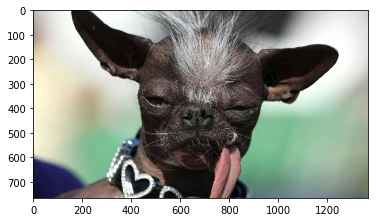

(765, 1366, 4)


In [2]:
elwood = plt.imread('https://uc0170116b55b82902b9631ddd4d.previews.dropboxusercontent.com/p/thumb/AAu4QZavkyjgt0qEeJKLSVES38FfjopcJSGqL7ScCFU7DxfQ0PM2Ujm5PnKBYcursNfV_hh-cnCNgbs8bqsO-0IVDQVoe83j1aj9o9x1W-gW3MbR4s2pqTvSI7qAAymHj0OnffmGv_r2IV2npYJs1od-WtG39T7rr3BoTIPOcY6gfa4AU1ZE3Iv7WJ6izRMCQS1kgCDeGAyTvfFIbUveOneaJxN2iiRvIJ1FIi20B79QM6nbPHVxKRKE8S50PX-o4UvBePCDBaCArHREcFraXBKV2p3n_th1_JCe-unP1eQiPwF-8L6PAvs8L4KY2TQQ5GILegykpu2rbKKFSJa40zIS5WJGQI-JFyIcdGa1d8sne6W_mmnmQr9cBAGhYWgd9PudtEUEuEhr8vP1pnmllk8wbRlPwVxAWO8x_zXvcFgyP7F2PqNlm-Zu5SPFMyENkwja612XOK7lHQjjHxIlmjxOJbqn4r46r7zAG-YgvXsynNrh7ztxgYU7PM3_lZbaEqG_xB3n_suLkug08Pgs-lg1HkrF4eLvrr54KSmQzQlurmR_z9pfnuBIWC0m_WHZqz4/p.png?fv_content=true&size_mode=5')
plt.imshow(elwood)
plt.show()

print(elwood.shape)

Como vemos, se trata de una imagen en colores. Para detectar los bordes, no nos interesan los colores, si no que la estructura de la imagen, por eso la convertimos a una imagen en colores de grises. Para esto, tomamos simplemente el promedio de los colores rojo, verde y azul de la imagen original. Las dimensiones ahora solo consisten en el ancho y alto.

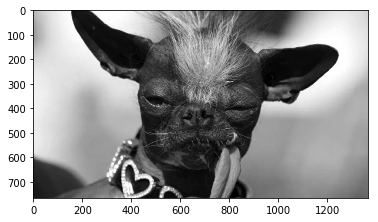

(765, 1366)


In [3]:
elwood_gris = np.mean(elwood, axis=2)
plt.imshow(elwood_gris,cmap='gray')
plt.show()

print(elwood_gris.shape)

## Detección de bordes

Para detectar los bordes necesitamos primero implementar un filtro pasa altos, es decir, alguna forma de resaltar las altas frecuencias, es decir, las diferencias entre los píxeles de la imagen. Para esto podemos utilizar, igual que en el caso del audio, la convolución con un kernel que resalte las diferencias. En este caso la convolución es en dos dimensiones, por eso usaremos la función ```convolve2d``` de ```scipy```. Primero lo haremos en la dimensión x.

[[ 0  0  0]
 [-1  0  1]
 [ 0  0  0]]


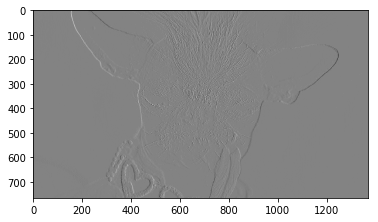

In [4]:
kernel_dx = np.array([0, 0, 0, -1, 0, 1, 0, 0, 0]).reshape(3,3)
print(kernel_dx)

diferencias_x = sp.convolve2d(elwood_gris,kernel_dx)

plt.imshow(diferencias_x,cmap='gray')
plt.show()

Para detectar las diferencias en y, simplemente necesitamos trasponer la matriz del kernel anterior. Para eso, podemos usar la función ```transpose``` de ```numpy```.

[[ 0 -1  0]
 [ 0  0  0]
 [ 0  1  0]]


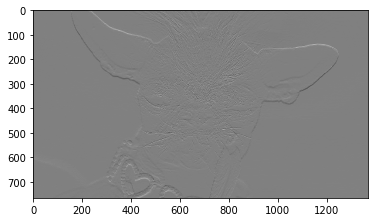

In [5]:
kernel_dy = np.transpose(kernel_dx)
print(kernel_dy)

diferencias_y = sp.convolve2d(elwood_gris,kernel_dy)

plt.imshow(diferencias_y,cmap='gray')
plt.show()

Las diferencias en ambas direcciones de la imagen, se pueden construir sumando las diferencias en ambos ejes. Como nos interesan los bordes, no nos importan si las diferencias son negativas o positivas, por eso tomamos el valor absoluto, con la función ```abs``` de ```numpy```.

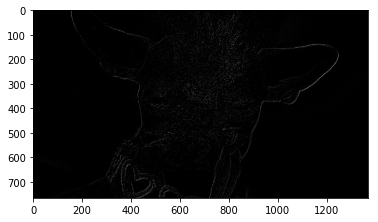

In [6]:
diferencias = diferencias_x+diferencias_y
diferencias_abs = np.abs(diferencias)
plt.imshow(diferencias_abs,cmap='gray')
plt.show()

Vemos que los bordes no se observan muy bien. Para verlos mejor, una técnica muy utilizada es binarizar la imagen, es decir, definir un umbral y marcar los píxeles que superan el umbral con un 1 y lo que no con un 0. Distintos umbrales producen distintas detecciones de bordes.

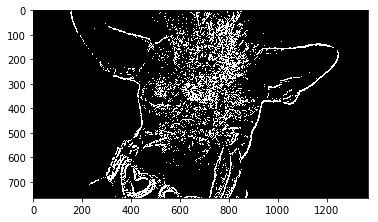

In [7]:
umbral = 0.05

elwood_bordes = diferencias_abs > umbral

plt.imshow(elwood_bordes,cmap='gray')
plt.show()

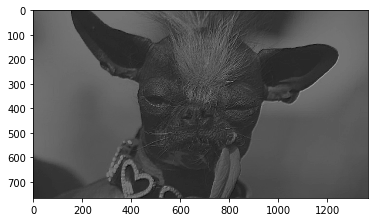

In [8]:
elwood_suave = elwood_gris - diferencias[0:765,0:1366]
plt.imshow(elwood_suave,cmap='gray')
plt.show()